In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import matplotlib as mpl

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import SphericalRepresentation

from astropy.table import Table

label_size = 15

mpl.rcParams['legend.fontsize'] = label_size - 7
mpl.rcParams['axes.labelsize'] = label_size 

mpl.rcParams['xtick.labelsize'] = label_size - 5
mpl.rcParams['ytick.labelsize'] = label_size - 5

mpl.rcParams['axes.labelpad'] = 10


coords = SkyCoord(ra=df.RA*u.deg,dec=df.DEC*u.deg)
#print("Min photon energy", min(df.PHOTON_ENERGY))
#print("Max photon energy", max(df.PHOTON_ENERGY))
#print("Total photon energy", np.sum(df.PHOTON_ENERGY))

print(coords)

NameError: name 'df' is not defined

In [ ]:
def plot_cluster(fname = "8zi62d6va3dtil0t/phlist_xissim.fits",mode='wrapped')

    dat = Table.read(fname, format='fits')
    df = dat.to_pandas()

    if mode=='wrapped':
        phi = df.RA * (np.pi/180)
        rho = np.abs(df.DEC-90) * (np.pi/180)
        x,y = rho * np.cos(phi), rho * np.sin(phi)

        plt.figure(figsize=(8,8))
        hist, xedges, yedges = np.histogram2d(x=x, y=y, bins=(100,100))
        cbar = plt.imshow(np.log10(hist))
        plt.colorbar(cbar)
    else:
        plt.figure(figsize=(4,4))
        plt.hist2d(x=df.RA,
                   y=df.DEC,
                   weights=df.PHOTON_ENERGY,
                   cmap = plt.cm.viridis,
                   bins=100)
    plt.xlabel("RA"), plt.ylabel("DEC")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    plt.close()
    
    return None



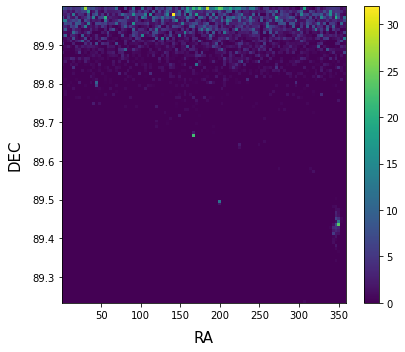

In [31]:
plt.figure(figsize=(6,5))
plt.hist2d(x=df.RA, 
           y=df.DEC,
           weights=df.PHOTON_ENERGY,
           cmap = plt.cm.viridis,
           bins=100)
plt.colorbar(label="")
plt.xlabel("RA"), plt.ylabel("DEC")
plt.tight_layout()
#plt.savefig("cluster_1.png",dpi=200)
plt.show()
plt.close()

Questions:
- how to properly do 2D histogram with 3D data
- why is there such a wide range of RAs and DECs if this is for a single cluster?
- how to pick or know the right bin size to represent the actual pixel size of the image
    - look at eRosita docs, number of pixels in field of view (FOV) and size of each pixel
    - ADS literature search with eRosita and sort by high citations
    - check if FOV bounded by RA/DEC in PHOX same as FOV for eRosita
    - if FOV agrees, we can plot pixel size properly
    
Klaus PI. of magneticum

To do:
- things at 90 are at center=> put at 0, 0
- ra will go from 0 to 360
- recast to x-y units from a sphere surface or use astropy frame
- plot in log in photon counts
--------


To do (proper binning)!
- FOV is set so same sky area for each cluster grabbed from PHOX
- FOV is a square, where the FOV measurement of one side of the square
- Arcminutes to degrees to radians
- unlikely to have photons at edge of image for smaller clusters